In [1]:
import pathlib
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

result_dir = pathlib.Path.cwd().parent / "dataset" / "result"
dataset_path = next(result_dir.glob("part*.csv"))

Load bitcoin subreddit dataset

In [2]:
df = pl.read_csv(dataset_path)

bitcoin_df = df.filter(pl.col("subreddit") == "Bitcoin")
bitcoin_df = bitcoin_df.with_column((pl.col("year") + "-" + pl.col("day")).str.strptime(pl.Date, "%Y-%-j").alias("date"))
bitcoin_df

year,day,subreddit,avg_polarity,avg_subjectivity,count,date
i64,i64,str,f64,f64,i64,date
2010,253,"""Bitcoin""",0.0,0.0,1,2010-09-10
2010,313,"""Bitcoin""",-0.0125,0.0375,10,2010-11-09
2010,322,"""Bitcoin""",0.2,0.2,1,2010-11-18
2010,332,"""Bitcoin""",-0.3,0.6,1,2010-11-28
2010,342,"""Bitcoin""",0.35,0.5,1,2010-12-08
2010,344,"""Bitcoin""",0.0,0.0,2,2010-12-10
2010,345,"""Bitcoin""",0.163964,0.551535,6,2010-12-11
2010,346,"""Bitcoin""",0.184028,0.659028,3,2010-12-12
2010,347,"""Bitcoin""",0.061984,0.623254,5,2010-12-13


Load bitcoin coin dataset

In [3]:
coin_Bitcoin_df = pl.read_csv(result_dir / "coin_Bitcoin.csv")
coin_Bitcoin_df = coin_Bitcoin_df.with_column(pl.col("Date").str.strptime(pl.Date, "%Y-%m-%d %H:%M:%S").alias("date"))
coin_Bitcoin_df

SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,date
i64,str,str,str,f64,f64,f64,f64,f64,f64,date
1,"""Bitcoin""","""BTC""","""2013-04-29 23:...",147.488007,134.0,134.444,144.539993,0.0,1.6038e9,2013-04-29
2,"""Bitcoin""","""BTC""","""2013-04-30 23:...",146.929993,134.050003,144.0,139.0,0.0,1.5428e9,2013-04-30
3,"""Bitcoin""","""BTC""","""2013-05-01 23:...",139.889999,107.720001,139.0,116.989998,0.0,1.2990e9,2013-05-01
4,"""Bitcoin""","""BTC""","""2013-05-02 23:...",125.599998,92.281898,116.379997,105.209999,0.0,1.1685e9,2013-05-02
5,"""Bitcoin""","""BTC""","""2013-05-03 23:...",108.127998,79.099998,106.25,97.75,0.0,1.0860e9,2013-05-03
6,"""Bitcoin""","""BTC""","""2013-05-04 23:...",115.0,92.5,98.099998,112.5,0.0,1.2503e9,2013-05-04
7,"""Bitcoin""","""BTC""","""2013-05-05 23:...",118.800003,107.142998,112.900002,115.910004,0.0,1.2887e9,2013-05-05
8,"""Bitcoin""","""BTC""","""2013-05-06 23:...",124.663002,106.639999,115.980003,112.300003,0.0,1.2490e9,2013-05-06
9,"""Bitcoin""","""BTC""","""2013-05-07 23:...",113.444,97.699997,112.25,111.5,0.0,1.2406e9,2013-05-07


Merge dataframes

In [4]:
df = bitcoin_df.join(
    coin_Bitcoin_df,
    on="date"
).select(["date", "avg_polarity", "avg_subjectivity", "High", "Low", "Open", "Close", "Volume", "Marketcap"])
df

date,avg_polarity,avg_subjectivity,High,Low,Open,Close,Volume,Marketcap
date,f64,f64,f64,f64,f64,f64,f64,f64
2013-04-29,0.090386,0.381859,147.488007,134.0,134.444,144.539993,0.0,1.6038e9
2013-04-30,0.091744,0.383323,146.929993,134.050003,144.0,139.0,0.0,1.5428e9
2013-05-01,0.088833,0.372658,139.889999,107.720001,139.0,116.989998,0.0,1.2990e9
2013-05-02,0.070066,0.346217,125.599998,92.281898,116.379997,105.209999,0.0,1.1685e9
2013-05-03,0.086569,0.368026,108.127998,79.099998,106.25,97.75,0.0,1.0860e9
2013-05-04,0.086774,0.359496,115.0,92.5,98.099998,112.5,0.0,1.2503e9
2013-05-05,0.099749,0.389241,118.800003,107.142998,112.900002,115.910004,0.0,1.2887e9
2013-05-06,0.090339,0.382682,124.663002,106.639999,115.980003,112.300003,0.0,1.2490e9
2013-05-07,0.103614,0.3878,113.444,97.699997,112.25,111.5,0.0,1.2406e9


Observe correlation over time with high

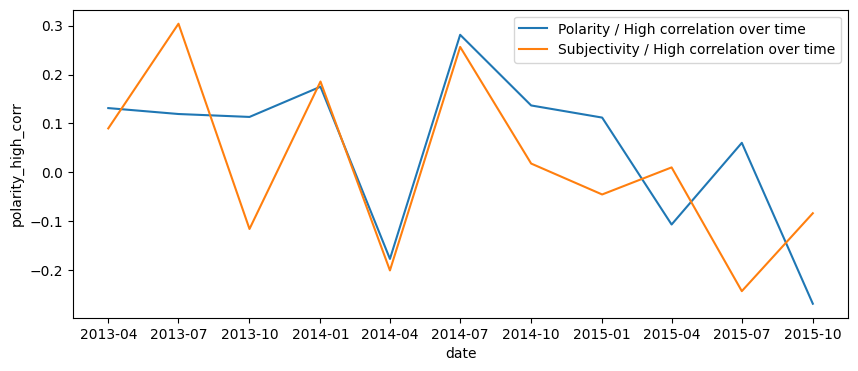

In [5]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

correlation_over_time_df = df\
.groupby_dynamic("date", every="1w")\
.agg([
    pl.pearson_corr("avg_polarity", "High").alias("polarity_high_corr"),
    pl.pearson_corr("avg_subjectivity", "High").alias("subjectivity_high_corr")
])\
.groupby_dynamic("date", every="3mo")\
.agg([
    pl.col("polarity_high_corr").mean(),
    pl.col("subjectivity_high_corr").mean()
])

ax = sns.lineplot(correlation_over_time_df, x="date", y="polarity_high_corr", ax=ax, label="Polarity / High correlation over time")
ax = sns.lineplot(correlation_over_time_df, x="date", y="subjectivity_high_corr", ax=ax, label="Subjectivity / High correlation over time")